## Logistic Regression (Regresión Logística)

La regresión logística es una técnica estadística y de machine learning que se utiliza para clasificar datos, mientras que las regresiones lineales buscan predecir una variable continua **la regresión logística se enfoca en predecir la clase de una variable categórica.**

Por lo tanto forma parte de los modelos de clasificación. Es sencillo de implementar, tiene buen rendimiento cuando las clases son linealmente separables, trabaja mejor con clases binarias y es un modelo probabilístico. 

**La regresión logística mide la probabilidad de que un patrón pertenezca a una clase u otra.**

### Función Logística (Sigmoid)

La función logística, también conocida como **función sigmoidal** (o Sigmoid en inglés) es la función que le da nombre a este clasificador.

Ésta función se define de la siguiente forma:

$$sigmoid(x) = \frac{1}{1 + e^{-x}} = \frac{e^{x}}{e^{x} + 1}$$

Gráfica de la función sigmoidal:
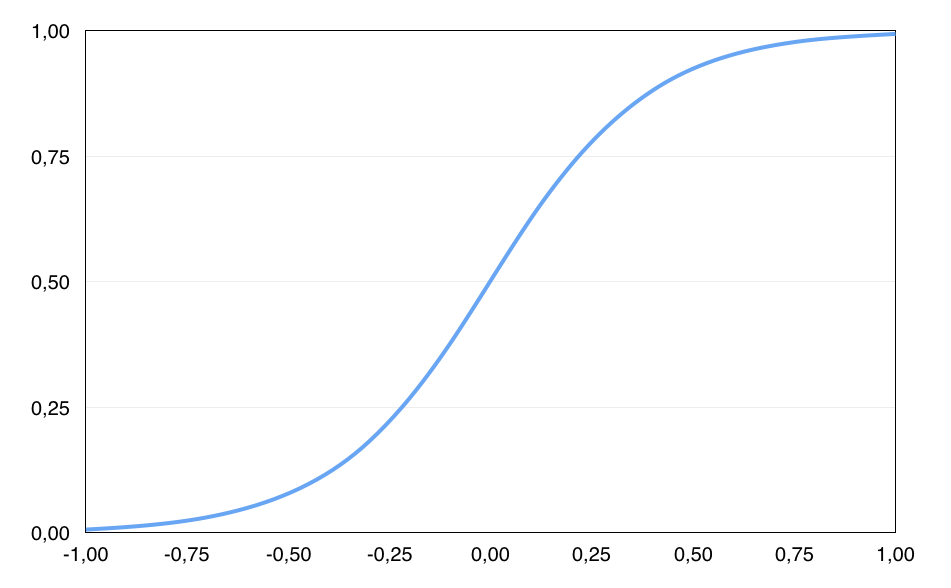


**La función sigmoidal mostrada arriba es la que se usaría si tuviésemos un modelo de una sola característica (atributo).**

Para **modelos multilíneales** el valor de **$x$ será sustituido por una función que se ajuste mejor a los datos de entrenamiento**, dando de esta forma una **variante de la función sigmoidal**, en otras palabras, estaríamos hablando de una función sigmoidal donde **$x$ pasa a ser una función de n-variables (una por cada atributo o columna)**, similar a lo que sucede con las **Regresiones Lineales**.

Para estos casos, la función sigmoidal sería: 

$$sigmoid(x) = \frac{1}{1 + e^{-(w_{0}*x_{0} + w_{1}*x_{1}+...+w_{n})}}$$



**$x$ pasa a ser una ecuación lineal resultado de una regresión lineal que se ajusta lo mejor posible a los datos.**

- El **dominio de esta función son todos los números reales** y el rango o **codominio son los valores entre 0 y 1**, sin incluirlos, es decir, **nunca llegan a ser 0 o 1**.


- La idea detrás de este clasificador es **"transformar"** cada instancia del conjunto de entrenamiento **usando la función sigmoidal**, dando como **resultado un número entre 0 y 1**. Dependiendo del resultado, el clasificador asignará una clase a cada instancia. **Si el resultado es <= 0.5 el clasificador lo asignará a la clase 0, si el resultado es > 0.5 el clasificador lo asignará a la clase 1**.


- **La regresión logística es un algoritmo lineal** (con una transformación no lineal en la salida). **Asume una relación lineal entre las variables de entrada con la salida.** Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden dar como **resultado un modelo más preciso**. Por ejemplo, puede usar **log, sqrt, Box-Cox y otras transformaciones** univariadas para exponer mejor esta relación.


- **El modelo puede sobreajustarse (overfitting)** si tiene varias características (atributos) altamente correlacionados. Podemos considerar eliminar las características (atributos) altamente correlacionadas.


- **Es posible que el proceso de estimación de probabilidad esperada que aprende los coeficientes no converja**. Esto puede suceder si hay muchas características altamente correlacionadas o tenemos una matriz **sparse** (una matriz con muchos ceros).


_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html_

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==2.0.2
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1


In [3]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases

In [4]:
X.shape, y.shape

((100, 2), (100,))

### Train, Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### Procesamiento

In [6]:
# Normalización de datos

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

### Modelo

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predicciones

In [8]:
yhat = model.predict(X_test)

yhat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [9]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [10]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[17,  0],
       [ 0, 13]])

### Classification Report

In [11]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      1.000     1.000     1.000        13

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



### Métodos y Atributos del Modelo

In [12]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.23092869, 0.76907131],
       [0.24342658, 0.75657342],
       [0.38647962, 0.61352038],
       [0.63235963, 0.36764037],
       [0.76904877, 0.23095123],
       [0.66851675, 0.33148325],
       [0.82094604, 0.17905396],
       [0.26725034, 0.73274966],
       [0.67595616, 0.32404384],
       [0.69568849, 0.30431151],
       [0.62674614, 0.37325386],
       [0.66099221, 0.33900779],
       [0.23293365, 0.76706635],
       [0.77694793, 0.22305207],
       [0.31910531, 0.68089469],
       [0.74389775, 0.25610225],
       [0.12019387, 0.87980613],
       [0.164413  , 0.835587  ],
       [0.63235963, 0.36764037],
       [0.58883506, 0.41116494],
       [0.32401604, 0.67598396],
       [0.40841208, 0.59158792],
       [0.69330048, 0.30669952],
       [0.77721818, 0.22278182],
       [0.26946016, 0.73053984],
       [0.78082461, 0.21917539],
       [0.71929372, 0.28070628],
       [0.35205682, 0.64794318],
       [0.6349723 , 0.3650277 ],
       [0.1423217 , 0.8576783 ]])

### Recta que separa las nubes de puntos

In [13]:
# Ecuación de la recta definida por el modelo

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [ 3.08099264 -2.63268412]
	Intercepción: 0.14075185890583447
	Ecuación: +3.081*w0 -2.633*w1 0.141
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(+3.081*w0 -2.633*w1 0.141))


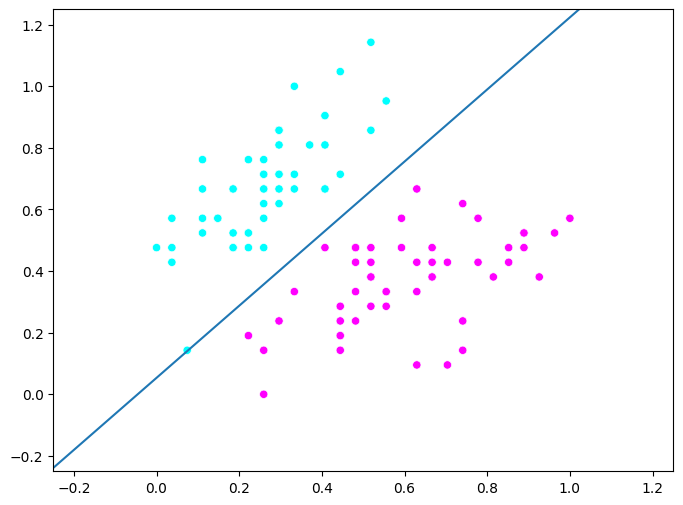

In [14]:
# Gráfico

X = x_scaler.transform(X)

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta
x_linspace = np.linspace(-0.25, 1.25, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.show()

### Representación de yhat y la función Sigmoid

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

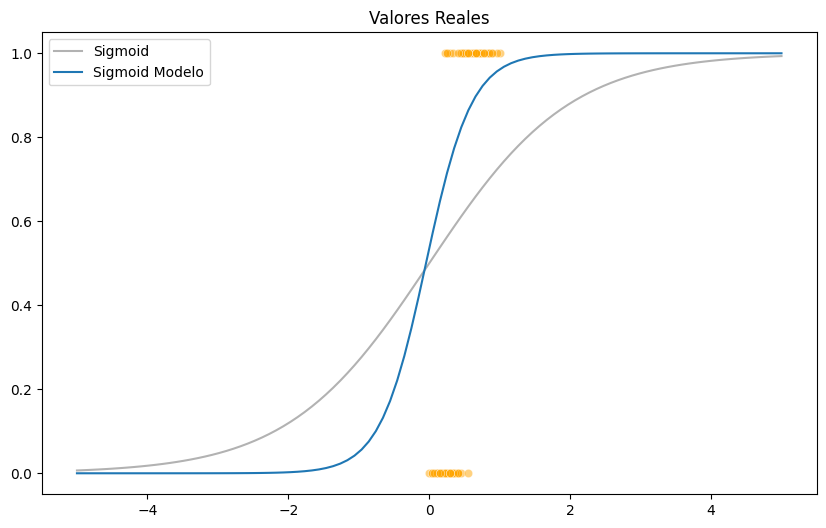

In [16]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_train & y_train
sns.scatterplot(x = X_train[:, 0], y = y_train, color = "orange", alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

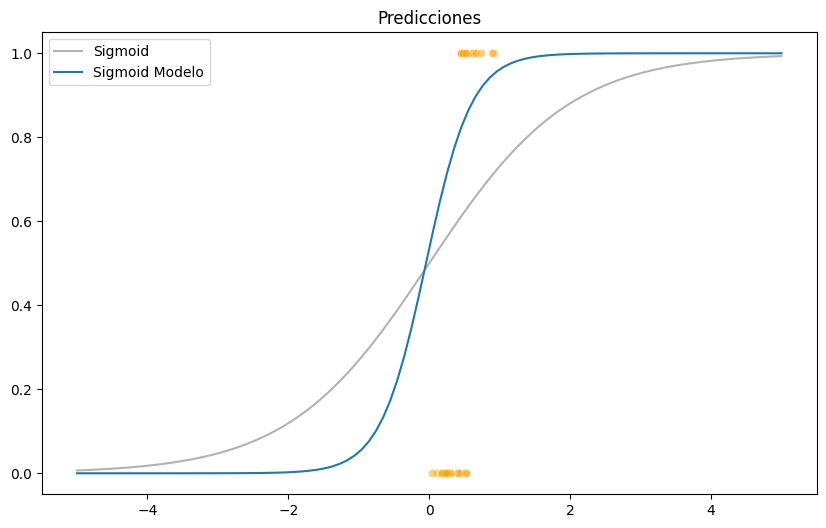

In [17]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

In [18]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset del titanic para practicar **`LogisticRegression()`**:

In [19]:
# Datos

df = pd.read_csv(filepath_or_buffer = "../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

# Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (700, 11), X_test: (176, 11)
y_train: (700,), y_test: (176,)


In [20]:
# LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy = accuracy_score(y_test, yhat)

print(accuracy)

0.7556818181818182
